In [1]:
!nvidia-smi

Sat Jun  5 01:46:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil
from glob import glob

In [3]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [4]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Preprocessing images

In [5]:
image_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_dir = '/content/grive/MyDrive/Face Mask Dataset/Train'
val_dir = '/content/grive/MyDrive/Face Mask Dataset/Validation'
test_dir = '/content/grive/MyDrive/Face Mask Dataset/Test'

In [7]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='binary')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# Building CNN Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=100
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 38s 221ms/step - loss: 6.2579 - accuracy: 0.5562 - val_loss: 0.5273 - val_accuracy: 0.5038
Epoch 2/30
100/100 [==============================] - 20s 196ms/step - loss: 0.8545 - accuracy: 0.6981
Epoch 3/30
100/100 [==============================] - 19s 190ms/step - loss: 0.3833 - accuracy: 0.8313
Epoch 4/30
100/100 [==============================] - 19s 192ms/step - loss: 0.2481 - accuracy: 0.9047
Epoch 5/30
100/100 [==============================] - 19s 193ms/step - loss: 0.1307 - accuracy: 0.9520
Epoch 6/30
100/100 [==============================] - 19s 189ms/step - loss: 0.0845 - accuracy: 0.9698
Epoch 7/30
100/100 [==============================] - 19s 191ms/step - loss: 0.0703 - accuracy: 0.9729
Epoch 8/30
100/100 [==============================] - 19s 189ms/step - loss: 0.0516 - accuracy: 0.9815
Epoch 9/30
100/100 [==============================] - 19s 189ms/step - loss: 0.0358 - accuracy: 0.9876
Epoch 10/30
100/100 [==========

In [12]:
model.save('model_large_data.h5')

# Evaluation on model

In [13]:
result.history['accuracy']

[0.5561249852180481,
 0.6772500276565552,
 0.8640000224113464,
 0.9200000166893005,
 0.9598749876022339,
 0.971750020980835,
 0.9766250252723694,
 0.9823750257492065,
 0.987625002861023,
 0.9906250238418579,
 0.9913750290870667,
 0.984000027179718,
 0.9890000224113464,
 0.9923750162124634,
 0.9943749904632568,
 0.9943749904632568,
 0.9958750009536743,
 0.996749997138977,
 0.9963750243186951,
 0.9835000038146973,
 0.9886249899864197,
 0.9929999709129333,
 0.996999979019165,
 0.9981250166893005,
 0.9984999895095825,
 0.9984999895095825,
 0.9992499947547913,
 0.9991250038146973,
 0.9938750267028809,
 0.9975000023841858]

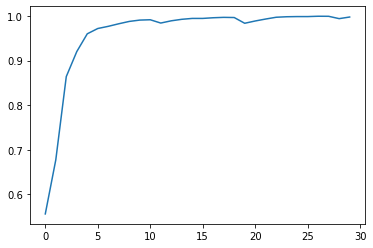

In [14]:
plt.plot(result.history['accuracy'])

In [15]:
model.metrics_names

['loss', 'accuracy']

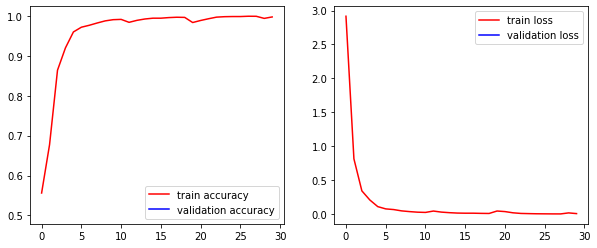

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
prediction = model.predict_classes(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
import math
num_of_examples = len(test_generator.filenames)
num_of_generator_calls = math.ceil(num_of_examples/(1.0*80))
test_labels=[]
for i in range(0,int(num_of_generator_calls)):
  test_labels.extend(np.array(test_generator[i][1]))


In [20]:
train_generator.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [21]:
confusion_matrix(test_labels, prediction)

array([[476,   7],
       [  2, 507]])

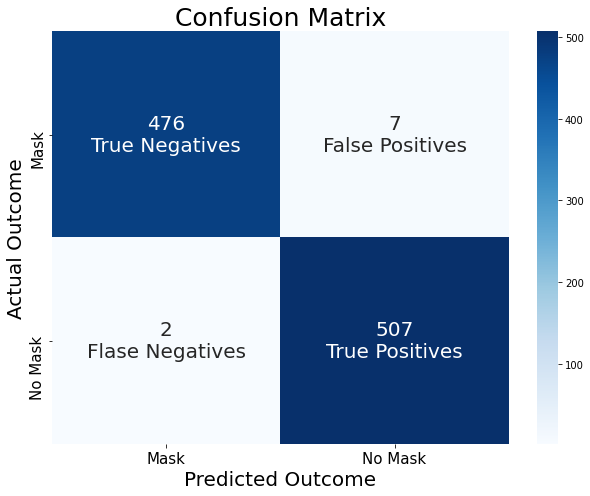

In [22]:
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Mask', 'No Mask']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [23]:
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       483
         1.0       0.99      1.00      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992

